# Part I - Ford GoBike System Data
## by Adelana Emmanuel

## Introduction

The Ford GoBike System Data dataset contains information about bike rides in a bike-sharing system covering the greater San Francisco Bay area. The dataset is one of the Udacity's curated dataset for the Data Analyst Nanodegree.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

## Preliminary Wrangling

In [2]:
ford_data = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
ford_data.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [4]:
ford_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
ford_data.shape

(183412, 16)

In [6]:
ford_data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
ford_data.duplicated().sum()

0

In [8]:
ford_data.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [9]:
ford_data.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [10]:
ford_data.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

### What is the structure of your dataset?

The Ford GoBike system data has 18,3412 unique observations with 16 attributes with information on bike_id, users, ride duration and bike stations.

### What is/are the main feature(s) of interest in your dataset?

The main features of interest in this dataset include duration time, start time and end time, usertype, member birth year. member gender, bike share.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The dataset has a lot of categorical attributes that will be useful for descriptive analysis.


## Data Cleaning

In [11]:
#From our data wrangling above, we need to clean the dataset
ford_data_clean = ford_data.copy()

In [12]:
#There are missing information about the station and member biodata
ford_data_clean.dropna(inplace=True)

In [13]:
#change the data type of attributes
# create a dictionary of types
data_type = { "start_station_id":"object",
 "member_birth_year":"int64",
            "start_time":"datetime64[ns]",
            "end_time":"datetime64[ns]"}

ford_data_clean = ford_data_clean.astype(data_type)

In [14]:
ford_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

## Univariate Exploration

 #### Question - What is the distribution of the duration of bike ride?

In [15]:
# we will convert duration given in second to hours 
ford_data_clean["duration_hr"] = ford_data_clean["duration_sec"] / 3600

In [16]:
ford_data_clean.duration_hr.describe()

count    174952.000000
mean          0.195556
std           0.456168
min           0.016944
25%           0.089722
50%           0.141667
75%           0.219167
max          23.485556
Name: duration_hr, dtype: float64

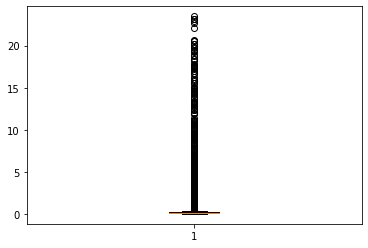

In [17]:
# Distribution of ride times
plt.boxplot(x= ford_data_clean.duration_hr);

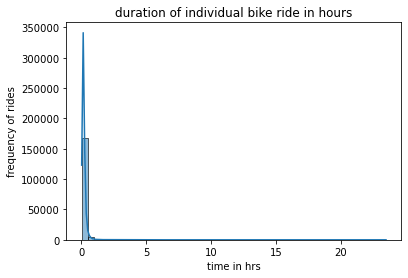

In [18]:
#we will plot a histogram showing the distribution

sns.histplot(data=ford_data_clean, x=ford_data_clean["duration_hr"], kde= True, bins=50)
plt.xlabel("time in hrs")
plt.ylabel("frequency of rides")
plt.title("duration of individual bike ride in hours");

##### The distribution of bike riding in hours has the mean of 0.19hrs with outliers as high as 23hrs.

#### Member gender
##### What is the distribution of bike riders by gender

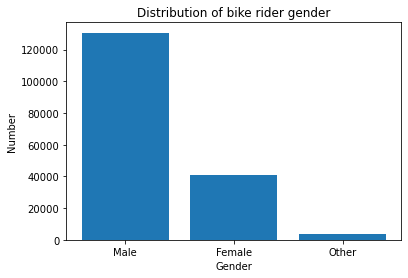

In [19]:
# chart showing the distribution of member gender
gender = ford_data.member_gender.value_counts()

plt.bar(x = gender.index, height= gender.values)
plt.xlabel("Gender")
plt.ylabel("Number")
plt.title("Distribution of bike rider gender");

##### The distribution of the gender of bike riders is within three groups; male, female and other.

#### User type
##### Given the model of bike sharing system, what is the distribution of total number of rides by user types?

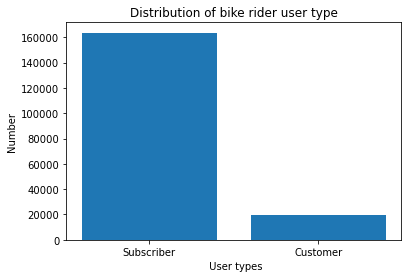

In [20]:
# chart showing the distribution of user type
user_type = ford_data.user_type.value_counts()
plt.bar(x = user_type.index, height= user_type.values)
plt.xlabel(" User types")
plt.ylabel("Number")
plt.title("Distribution of bike rider user type");

##### The bike users are categorized into two; subscribers and customers, with more subscribers.

#### Distribution of member birth year
##### How do you year of birth invariably age, affect the riding of bikes?

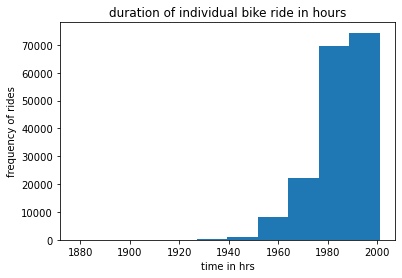

In [21]:
plt.hist(x=ford_data.member_birth_year)
plt.xlabel("time in hrs")
plt.ylabel("frequency of rides")
plt.title("duration of individual bike ride in hours");

##### Majority of the bike users are born between the year 1960 and 2000.

#### most used starting and ending stations
##### Do users prefer some station to others, what is the distribution of usage?

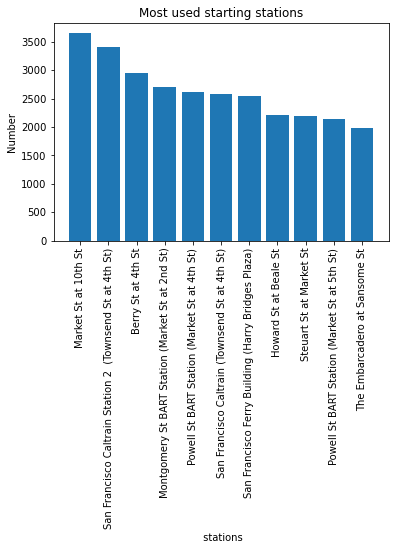

In [22]:
most_start = ford_data_clean.start_station_name.value_counts(ascending = False)[ : 11]
plt.bar(x = most_start.index, height= most_start.values)
plt.xlabel(" stations")
plt.ylabel("Number")
plt.title("Most used starting stations")
plt.xticks(rotation=90);

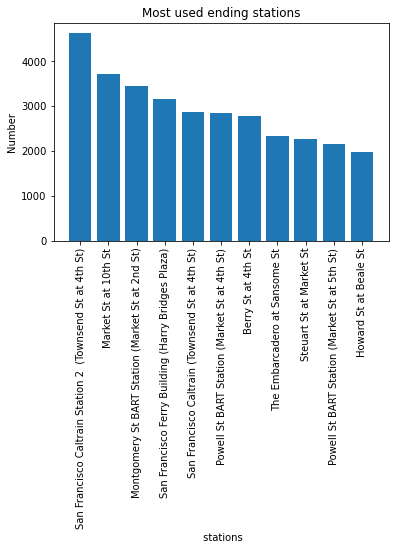

In [23]:
most_end = ford_data_clean.end_station_name.value_counts(ascending = False)[ : 11]
plt.bar(x = most_end.index, height= most_end.values)
plt.xlabel(" stations")
plt.ylabel("Number")
plt.title("Most used ending stations")
plt.xticks(rotation=90);

#### least used starting and ending stations

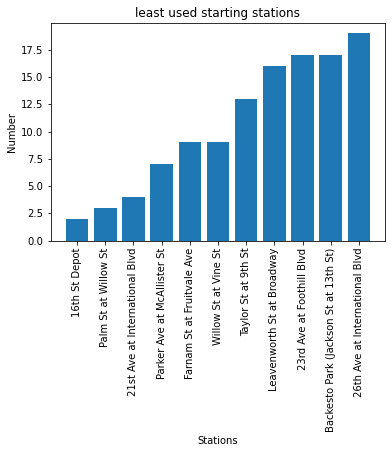

In [24]:
least_start = ford_data_clean.start_station_name.value_counts(ascending = True)[ : 11]
plt.bar(x = least_start.index, height= least_start.values)
plt.xlabel("Stations")
plt.ylabel("Number")
plt.title("least used starting stations")
plt.xticks(rotation=90);

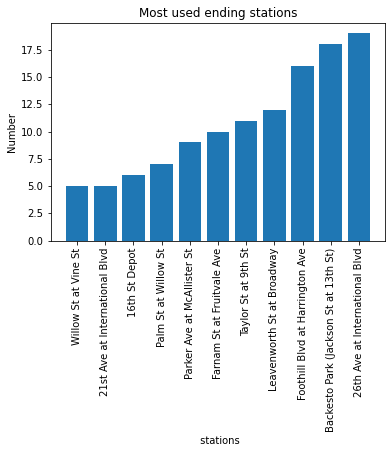

In [25]:
least_end = ford_data_clean.end_station_name.value_counts(ascending = True)[ : 11]
plt.bar(x = least_end.index, height= least_end.values)
plt.xlabel(" stations")
plt.ylabel("Number")
plt.title("Most used ending stations")
plt.xticks(rotation=90);

##### The usage of each station varies, some stations well used as starting stations others as ending stations.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

We perform conversation on the unit of duration each individual of bike ride, we converted the attribute from seconds to hours. A summary statistic on the duration of ride show that the mean duration of rides is about 0.19hour  with the distribution of time rightly skewed the outliers were as high as 23hours.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

After assessing the dataset will carried out cleaning process which involved dropping the observations with null values in the attributes essential to our analysis, also the convert to appropriate data format was done where needed. Cleaning was done to preserve the integrity of our data analysis.

## Bivariate Exploration

#### Duration of ride and year of birth 

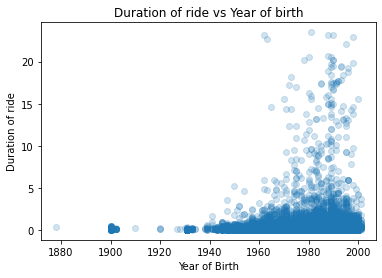

In [26]:
# plot a scatter plot
plt.scatter(ford_data_clean.member_birth_year, ford_data_clean.duration_hr, alpha= 1/5)
plt.xlabel("Year of Birth")
plt.ylabel("Duration of ride")
plt.title("Duration of ride vs Year of birth");

In [27]:
# correlation between member birth year and ride duration
ford_data_clean.duration_hr.corr(ford_data_clean.member_birth_year)

-0.0060411748752546455

#### Distribution of duration of ride and gender

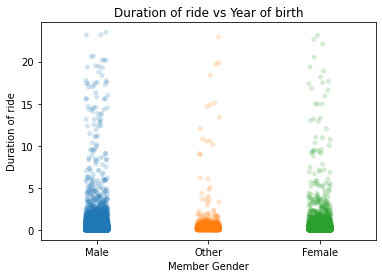

In [28]:
# plot a scatter plot showing the distribution of ride vis-a-vis gender
sns.stripplot(data= ford_data_clean, x ="member_gender" , y = "duration_hr", jitter=True, alpha= 1/5)
plt.xlabel("Member Gender")
plt.ylabel("Duration of ride")
plt.title("Duration of ride vs Year of birth");

#### Total hours of ride by Gender

In [29]:
gender_duration = ford_data_clean.groupby("member_gender")["duration_hr"].sum()

In [30]:
gender_duration 

member_gender
Female     8828.306389
Male      24374.313333
Other      1010.349167
Name: duration_hr, dtype: float64

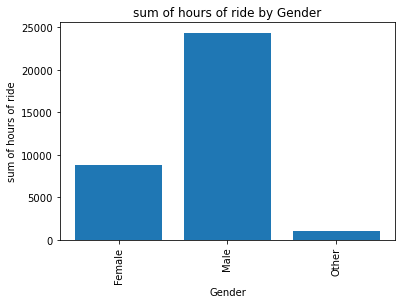

In [31]:
plt.bar(x=gender_duration.index, height=gender_duration.values)
plt.xlabel("Gender")
plt.ylabel("sum of hours of ride")
plt.title("sum of hours of ride by Gender")
plt.xticks(rotation=90);

#### Average riding time vs usertype

In [32]:
average_user_time = ford_data_clean.groupby("user_type")["duration_hr"].mean()
average_user_time

user_type
Customer      0.364071
Subscriber    0.177931
Name: duration_hr, dtype: float64

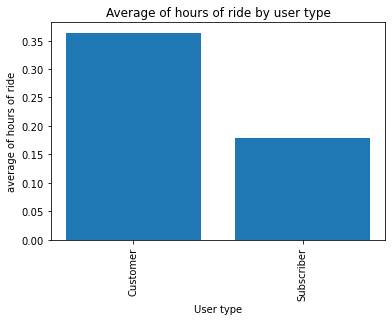

In [33]:
plt.bar(x=average_user_time.index, height=average_user_time.values)
plt.xlabel("User type")
plt.ylabel("average of hours of ride")
plt.title("Average of hours of ride by user type")
plt.xticks(rotation=90);

#### weekday ride vs user types

In [34]:
weekday = ford_data_clean.start_time.dt.dayofweek
weekday.value_counts()
weekday_names = {"0":"Sunday",
                 "1":"Monday",
                 "2":"Tuesday",
                "3":"Wednesday",
                 "4":"Thursday",
                 "5":"Friday",
                 "6":"Saturday"}


In [35]:
ford_data_clean["day_week"] = ford_data_clean["start_time"].dt.dayofweek

In [36]:
day_week_user = pd.DataFrame(ford_data_clean.groupby(["day_week", "user_type"])["user_type"].count().unstack().reset_index())
day_week_user

user_type  day_week  Customer  Subscriber
0                 0      2309       23332
1                 1      2268       28316
2                 2      2110       26316
3                 3      2868       30844
4                 4      2541       25122
5                 5      2171       12243
6                 6      2299       12213

In [37]:
day_week_user.replace(day_week_user.day_week.values, weekday_names.values(), inplace=True)

In [38]:
day_week_user.values

array([['Sunday', 2309, 23332],
       ['Monday', 2268, 28316],
       ['Tuesday', 2110, 26316],
       ['Wednesday', 2868, 30844],
       ['Thursday', 2541, 25122],
       ['Friday', 2171, 12243],
       ['Saturday', 2299, 12213]], dtype=object)

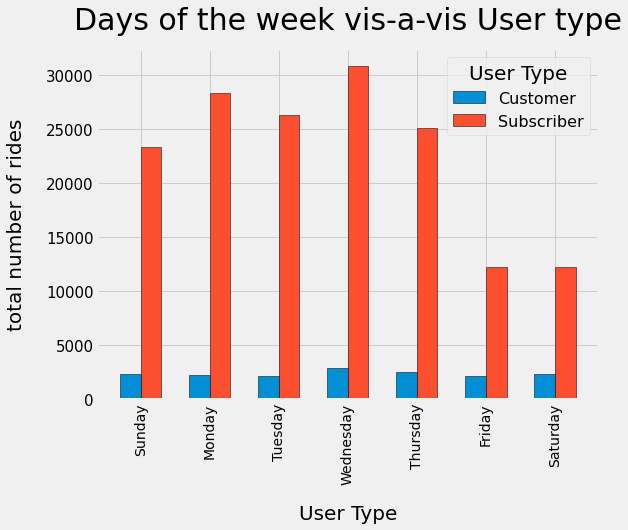

In [39]:
#source code adapted from https://towardsdatascience.com/easy-grouped-bar-charts-in-python-b6161cdd563d

plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1, figsize = (8,6))
label = day_week_user["day_week"]
x = np.arange(len(label))
width = 0.3
rect1 = ax.bar(x - width/2,
              day_week_user["Customer"],
              width = width, 
               label = 'Customer',
               edgecolor = "black"
              )
rect2 = ax.bar(x + width/2,
              day_week_user["Subscriber"],
              width = width,
              label = 'Subscriber',
              edgecolor = "black")
ax.set_ylabel("total number of rides",
             fontsize = 20,
             labelpad = 20)
ax.set_xlabel("User Type",
             fontsize = 20,
             labelpad =20)
ax.set_title("Days of the week vis-a-vis User type",
            fontsize = 30,
            pad = 20)
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend(title = "User Type",
         fontsize = 16,
         title_fontsize = 20)
ax.tick_params(axis = "x",
              which = "both",
              labelrotation = 90)
ax.tick_params(axis = "y",
              which = "both",
              labelsize = 15)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There is a strong negative correlation between duration of bike ride with the year of birth of members. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The total number of bike rides by customers stay fairly consistent while that of subscribers vary over the different days of the weeek.

## Multivariate Exploration

#### Average ride duration by user type by gender

In [40]:
ride_year_gender = pd.DataFrame(ford_data_clean.groupby(["user_type","member_gender"])["duration_hr"].mean().reset_index())
ride_year_gender

user_type member_gender  duration_hr
0    Customer        Female     0.395591
1    Customer          Male     0.348220
2    Customer         Other     0.445083
3  Subscriber        Female     0.193452
4  Subscriber          Male     0.171185
5  Subscriber         Other     0.253382

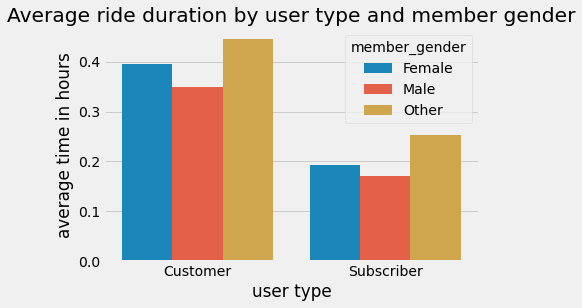

In [41]:
sns.barplot(data=ride_year_gender, x="user_type", y="duration_hr", ci=None, hue="member_gender")
plt.title("Average ride duration by user type and member gender")
plt.xlabel("user type")
plt.ylabel("average time in hours");

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The customers have higher average riding time than the subscribers even though the subscribers have higher total number of ride. 

### Were there any interesting or surprising interactions between features?

On the gender level, the female have higer riding tiem than male while the "other" outperform the two both among the customer and subscribers.



In [42]:
#save the clean dataset for use in part 2
ford_data_clean.to_csv("ford_data_clean.csv")

## Conclusions

1) The distribution of bike riding in hours has the mean of 0.19hrs with outliers as high as 23hrs.
2) Among the bike riders we have more males than females and more females than others.
3) The bike users are categorized into two; subscribers and customers, with more subscribers.
4) Majority of the bike users are born between the year 1960 and 2000.
5) The most used starting and ending station are Market St. at 10th St. and San Francisco Caltrain Station 2 respectively.
6) The least used starting and ending station are 16th St. Depot and Willow Sr at Vine St. respectively.
7) There is a negative correlation between duration of bike ride and member year of birth.
8) The male gender have the highest total bike riding time followed by the female gender followed by other.
9) The average riding time of customer is higher than the subscribers.
10) The total number of ride by subscribers is higher than customers.
11) The average bike riding time by the 'other' is higher than that of the female, with the male being the least.